### Importing Required Libraries

In [1]:
#Importing libraries

# For data manipulation
import numpy as np
import pandas as pd

#For visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

# Data Overview

### Reading the Data

In [3]:
bank = pd.read_csv('Bank_Churn.csv')
print('The dataset has {} rows and {} columns'.format(bank.shape[0],bank.shape[1]))

The dataset has 10000 rows and 13 columns


### Checking for null values

In [5]:
for col in bank.columns:
 print('There are {}% missing values in {} column'.format(np.round(bank[col].isnull().mean(),2),col))

There are 0.0% missing values in CustomerId column
There are 0.0% missing values in Surname column
There are 0.0% missing values in CreditScore column
There are 0.0% missing values in Geography column
There are 0.0% missing values in Gender column
There are 0.0% missing values in Age column
There are 0.0% missing values in Tenure column
There are 0.0% missing values in Balance column
There are 0.0% missing values in NumOfProducts column
There are 0.0% missing values in HasCrCard column
There are 0.0% missing values in IsActiveMember column
There are 0.0% missing values in EstimatedSalary column
There are 0.0% missing values in Exited column


### Unique count for each column

In [7]:
for col in bank.columns:
    print('There are {} unique values in {} column'.format(bank[col].nunique(),col))

There are 10000 unique values in CustomerId column
There are 2932 unique values in Surname column
There are 460 unique values in CreditScore column
There are 3 unique values in Geography column
There are 2 unique values in Gender column
There are 70 unique values in Age column
There are 11 unique values in Tenure column
There are 6382 unique values in Balance column
There are 4 unique values in NumOfProducts column
There are 2 unique values in HasCrCard column
There are 2 unique values in IsActiveMember column
There are 9999 unique values in EstimatedSalary column
There are 2 unique values in Exited column


### Dropping useless columns

In [9]:
bank.drop(columns={'CustomerId','Surname'},inplace=True)

### Checking numerical and categorical columns

In [11]:
numerical_cols = []
categorical_cols = []
for col in bank.columns:
    if bank[col].dtypes!='O':
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)
        
print('The numerical columns are: {}'.format(', '.join(numerical_cols)))
print('The categorical columns are: {}'.format(', '.join(categorical_cols)))

The numerical columns are: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited
The categorical columns are: Geography, Gender


# Exploratory Data Analysis

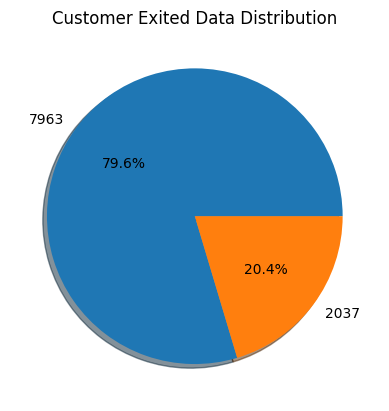

In [13]:
counts = bank['Exited'].value_counts()
plt.pie(x = counts,labels = counts.values, shadow = True,autopct='%1.1f%%')
plt.title('Customer Exited Data Distribution')
plt.show()

### There is clearly a class imbalance and in churn problems recall is the most important factor as we want most of the exiters to be correctly predicted

### Relation of target column with categorical variables

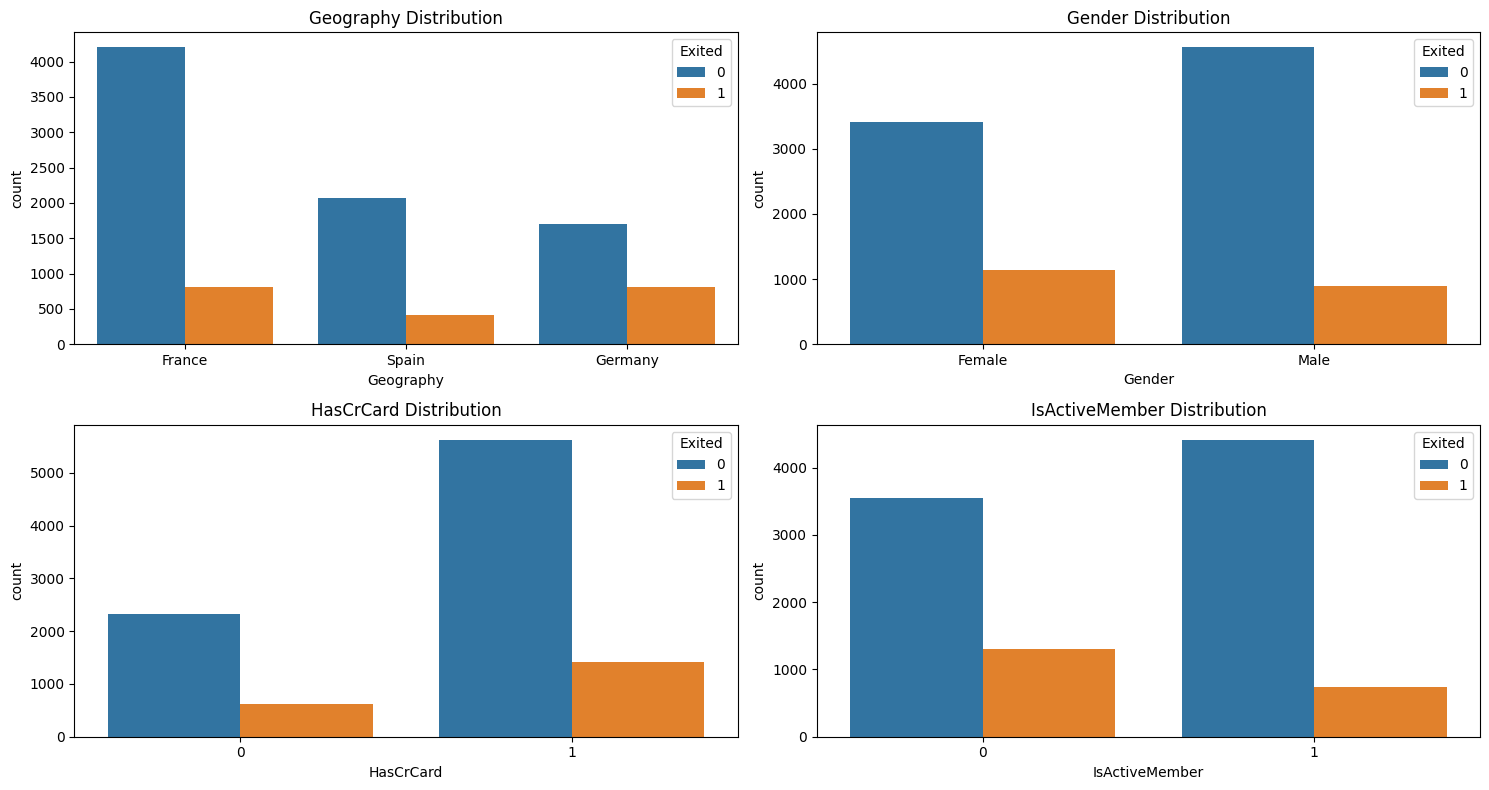

In [15]:
fig,ax =plt.subplots(2,2,figsize=(15,8))
sns.countplot(data = bank, x = 'Geography',hue = 'Exited',ax = ax[0][0])
ax[0][0].set_title('Geography Distribution')
sns.countplot(data = bank, x = 'Gender',hue = 'Exited',ax = ax[0][1])
ax[0][1].set_title('Gender Distribution')
sns.countplot(data = bank, x = 'HasCrCard',hue = 'Exited',ax = ax[1][0])
ax[1][0].set_title('HasCrCard Distribution')
sns.countplot(data = bank, x = 'IsActiveMember',hue = 'Exited',ax = ax[1][1])
ax[1][1].set_title('IsActiveMember Distribution')
plt.tight_layout() 
plt.show()

### Observations

1. The proportion of churners in Germany is higher compared to Spain and France.
2. Females are churning more frequently than males.
3. Active Members are less likely to churn.
4. Credit Card Distibution doesnt impact churning that much.

### Relation of target column with numerical variables

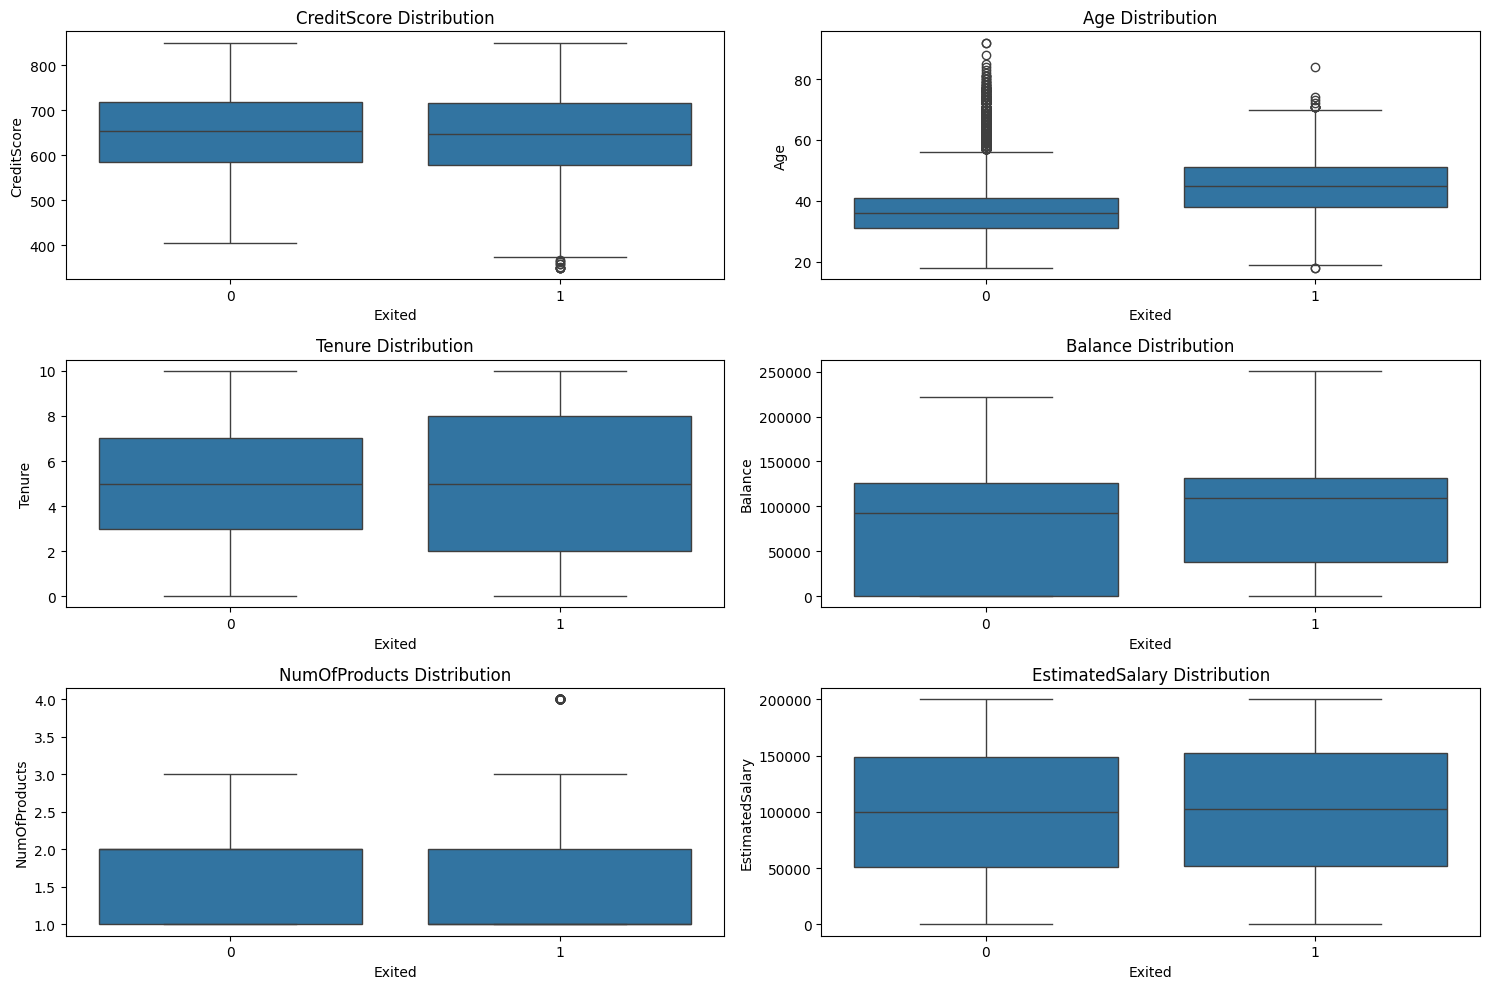

In [18]:
fig,ax =plt.subplots(3,2,figsize=(15,10))
sns.boxplot(data = bank,x = 'Exited',y = 'CreditScore',ax = ax[0][0])
ax[0][0].set_title('CreditScore Distribution')
sns.boxplot(data = bank,x = 'Exited',y = 'Age',ax = ax[0][1])
ax[0][1].set_title('Age Distribution')
sns.boxplot(data = bank,x = 'Exited',y = 'Tenure',ax = ax[1][0])
ax[1][0].set_title('Tenure Distribution')
sns.boxplot(data = bank,x = 'Exited',y = 'Balance',ax = ax[1][1])
ax[1][1].set_title('Balance Distribution')
sns.boxplot(data = bank,x = 'Exited',y = 'NumOfProducts',ax = ax[2][0])
ax[2][0].set_title('NumOfProducts Distribution')
sns.boxplot(data = bank,x = 'Exited',y = 'EstimatedSalary',ax = ax[2][1])
ax[2][1].set_title('EstimatedSalary Distribution')
plt.tight_layout() 
plt.show()

### Obseravtions: 

1. People with more age tend to churn more.
2. The people not churning are having less variance in tenure years with the value being stabilized around 3-7 years.
3. Bank is losing customers with higher bank balances more.
4. Number of Products,Salary,Credit Score doesnt have a significant immediate impact on likelihood to churn.

### Correlation between numerical columns

In [114]:
numerical_cols = [col for col in bank.columns if bank[col].dtypes!='O']

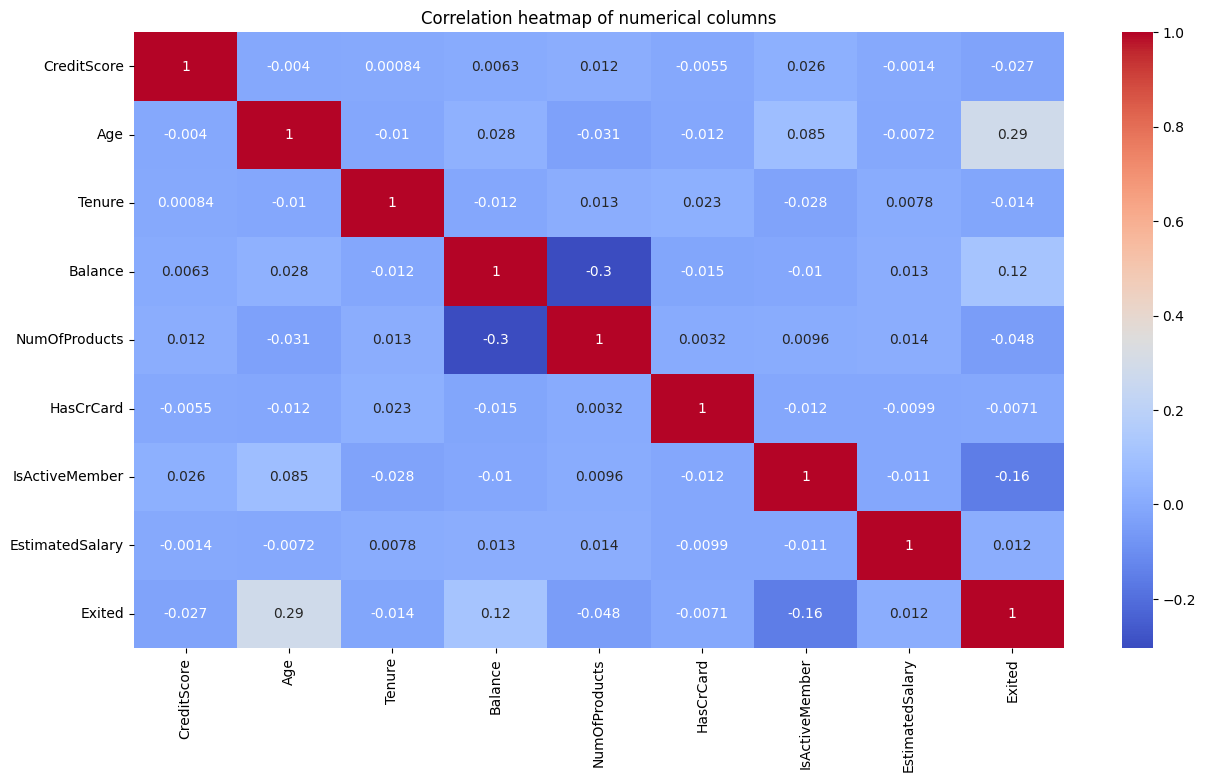

In [20]:
plt.figure(figsize=(15,8))
plt.title('Correlation heatmap of numerical columns')
sns.heatmap(bank[numerical_cols].corr(),cmap = "coolwarm",annot=True)
plt.show()

### As also discussed earlier Age,Balance aer having slightly better positive correlation than other factors and Activity of a member is slightly negatively correlated.